<a href="https://colab.research.google.com/github/jason147172/tibame/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

ship


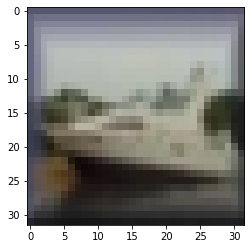

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 1792: ( 3(寬) * 3(高) * 3(input通道數:RGB) + 1(bias:全部位移到同一個起始點) ) * 64(過濾器個數)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 73856: ( 3(寬) * 3(高) * 64(input通道數) + 1(bias) ) * 128(過濾器個數)
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    Flatten(),
    Dense(256, activation="relu"),
    # Dropout[25%-50%]: (Dropout只用於訓練時)訓練時有一定機率丟棄神經元, 為了防止過擬合, 不過度依賴某些權重
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
      optimizer="adam",
      metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
      ModelCheckpoint("cnn.h5", save_best_only=True),
      EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train, 
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 3s - loss: 1.5738 - accuracy: 0.4250 - val_loss: 1.2001 - val_accuracy: 0.5808
Epoch 2/50
225/225 - 3s - loss: 1.1064 - accuracy: 0.6104 - val_loss: 0.9682 - val_accuracy: 0.6618
Epoch 3/50
225/225 - 3s - loss: 0.9030 - accuracy: 0.6855 - val_loss: 0.7978 - val_accuracy: 0.7312
Epoch 4/50
225/225 - 3s - loss: 0.7655 - accuracy: 0.7296 - val_loss: 0.7600 - val_accuracy: 0.7348
Epoch 5/50
225/225 - 3s - loss: 0.6505 - accuracy: 0.7743 - val_loss: 0.7099 - val_accuracy: 0.7554
Epoch 6/50
225/225 - 3s - loss: 0.5614 - accuracy: 0.8037 - val_loss: 0.6942 - val_accuracy: 0.7582
Epoch 7/50
225/225 - 3s - loss: 0.4618 - accuracy: 0.8377 - val_loss: 0.7249 - val_accuracy: 0.7584
Epoch 8/50
225/225 - 3s - loss: 0.3904 - accuracy: 0.8638 - val_loss: 0.7117 - val_accuracy: 0.7682
Epoch 9/50
225/225 - 3s - loss: 0.3155 - accuracy: 0.8901 - val_loss: 0.7472 - val_accuracy: 0.7616
Epoch 10/50
225/225 - 3s - loss: 0.2441 - accuracy: 0.9142 - val_loss: 0.8249 - val_accuracy: 0.7668

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7293 - accuracy: 0.7487


[0.729345977306366, 0.7487000226974487]

In [ ]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
# 調整維度
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


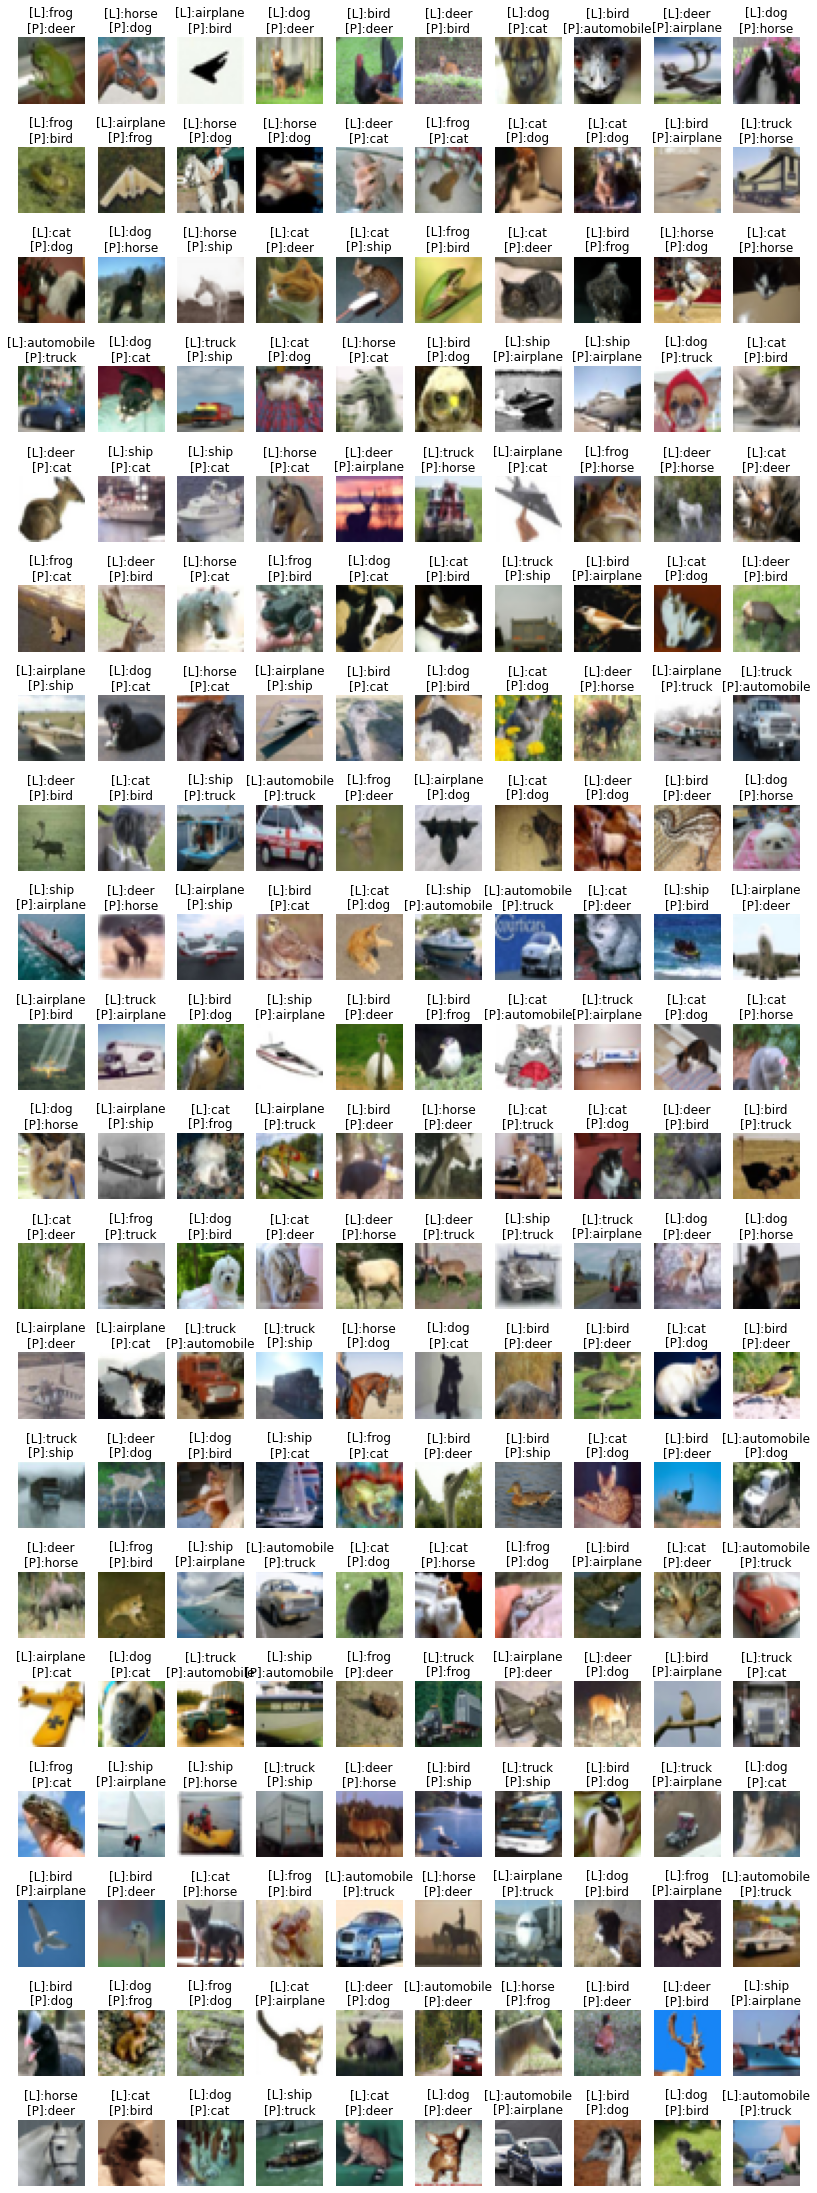

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test_reshape[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(trans[label], trans[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

輸入圖片網址:https://media.bnextmedia.com.tw/image/album/2018-01/img-1515398565-99051.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.18
cat 的機率: 0.29
deer 的機率: 0.04
dog 的機率: 0.48
frog 的機率: 0.0
horse 的機率: 0.01
ship 的機率: 0.0
truck 的機率: 0.0


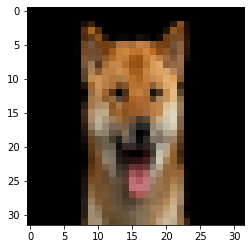

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入圖片網址:")
# 純文字: stream不加, 檔案: stream=True
# verify=False: 防火牆調低
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img))